## target
task : img classification

data : MNIST

In [3]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision

import matplotlib.pyplot as plt

In [7]:
# Hyper parameters
EPOCH = 1000
BATCH_SIZE = 50
LR = 0.01
DOWNLOAD_MNIST = True # 請求下載

## train data

In [8]:
# download data
train_data = torchvision.datasets.MNIST(
    root = './mnist',
    train=True, # is training data
    transform=torchvision.transforms.ToTensor(), # trans from numpy.ary to torch Tensor
    download = DOWNLOAD_MNIST,
)

Processing...
Done!


torch.Size([60000, 28, 28])
torch.Size([60000])


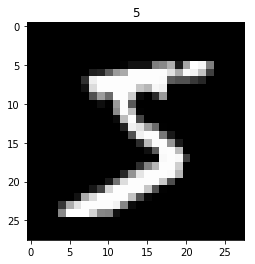

In [15]:
#plot one example
print(train_data.train_data.size())
print(train_data.train_labels.size())

plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

In [16]:
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

# test data

In [17]:
test_data = torchvision.datasets.MNIST(root='./mnist', train=False)
len(test_data)

10000

In [18]:
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1), volatile=True).type(torch.FloatTensor)
test_x = test_x[:2000]/255.

test_y = test_data.test_labels[:2000]

## build CNN

In [24]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(# input size(1,28,28)
            nn.Conv2d( 
                in_channels = 1, # gray(if RGB, then in_channel=3)
                out_channels = 16, # num_filter
                kernel_size=5, # filter's height and width = 5
                stride=1, # shift 1 distance each time
                padding=2, # if stride=1, padding=(kernel_size-1)/2, filled with zero
            ),# -->(16, 28, 28)
            nn.ReLU(),# -->(16, 28, 28)
            nn.MaxPool2d(kernel_size=2,),# -->(16, 14, 14)
        )
        self.conv2 = nn.Sequential(# input size(16,14,14)
            nn.Conv2d(16, 32, 5, 1, 2), #(in, out, kernel, strid, padding) # -->(32, 14, 14)
            nn.ReLU(),# -->(32, 14, 14)
            nn.MaxPool2d(2), # -->(32, 7, 7)
        )
        self.out = nn.Linear(32*7*7, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x) # (batch, 32, 7, 7)
        x = x.view(x.size(0), -1) #(batch, 32*7*7)
        output = self.out(x)
        return output

In [25]:
cnn=CNN()
print(cnn)

CNN (
  (conv1): Sequential (
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU ()
    (2): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (conv2): Sequential (
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU ()
    (2): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (out): Linear (1568 -> 10)
)


##  training

In [22]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

In [27]:
LOSS = 0.
ACCURACY = 0.
FROBERIUS_NORM = 100. # maximum first
EARLY_STOP_N = 30

for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x) # batch x
        b_y = Variable(y) # batch y
        
        output = cnn(b_x)
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch%50==0:
            test_output = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = sum(pred_y ==test_y)/ test_y.size(0)
            print('Epoch: ',step, 
                  ' | train loss %.4f'%loss.data[0], 
                  ' | test accuracy: %.4f'%accuracy
                 )
        
        # early stopping procedure
        if FROBERIUS_NORM < 
            
    if BREAK:break

Epoch:  0  | train loss 2.2948  | test accuracy: 0.1105
Epoch:  1  | train loss 2.3186  | test accuracy: 0.1105
Epoch:  2  | train loss 2.3104  | test accuracy: 0.1105
Epoch:  3  | train loss 2.3091  | test accuracy: 0.1105
Epoch:  4  | train loss 2.3098  | test accuracy: 0.1105
Epoch:  5  | train loss 2.3069  | test accuracy: 0.1105
Epoch:  6  | train loss 2.2833  | test accuracy: 0.1105
Epoch:  7  | train loss 2.3224  | test accuracy: 0.1105
Epoch:  8  | train loss 2.3266  | test accuracy: 0.1105
Epoch:  9  | train loss 2.2732  | test accuracy: 0.1105
Epoch:  10  | train loss 2.2674  | test accuracy: 0.1105
Epoch:  11  | train loss 2.3037  | test accuracy: 0.1105
Epoch:  12  | train loss 2.2772  | test accuracy: 0.1105
Epoch:  13  | train loss 2.2927  | test accuracy: 0.1105
Epoch:  14  | train loss 2.2965  | test accuracy: 0.1105
Epoch:  15  | train loss 2.3095  | test accuracy: 0.1105
Epoch:  16  | train loss 2.2867  | test accuracy: 0.1105
Epoch:  17  | train loss 2.3238  | test a

Process Process-6:
Process Process-5:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/bl515/anaconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/bl515/anaconda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/bl515/anaconda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/bl515/anaconda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/bl515/anaconda/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_queue.get()
  File "/Users/bl515/anaconda/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/Users/bl515/anaconda/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 34, in _worker_loop
    r = index_q

KeyboardInterrupt: 

In [47]:
b_x = Variable(x, requires_grad=True) # batch x
b_y = Variable(y) # batch y

output = cnn(b_x)
loss = loss_func(output, b_y)
# optimizer.zero_grad()
loss.backward()
# optimizer.step()

b_x.grad

Variable containing:
(0 ,0 ,.,.) = 
  8.7242e-06 -3.7729e-05 -6.2669e-05  ...  -2.4421e-05 -1.5999e-05  1.6544e-05
 -5.2367e-06  8.3261e-07 -1.4504e-05  ...   1.0418e-04 -7.7874e-06 -6.5517e-05
 -5.1890e-05 -7.5531e-05  2.3474e-05  ...  -3.1452e-05 -3.7316e-05  4.9402e-05
                 ...                   ⋱                   ...                
 -7.3679e-05 -7.0355e-05 -1.0655e-04  ...  -8.1998e-05  1.0263e-05  5.4588e-05
  6.7096e-05  7.7772e-05  3.3198e-06  ...  -8.5714e-05 -2.5767e-05 -7.5115e-06
  1.7531e-05  8.8201e-06 -1.4497e-05  ...   1.6264e-05  1.4679e-05 -3.2703e-05
     ⋮ 

(1 ,0 ,.,.) = 
  3.6892e-06  2.5530e-05 -1.6839e-05  ...   1.2035e-05 -8.2573e-07  9.6681e-06
 -6.7463e-05  3.7573e-05 -2.1145e-05  ...   2.1406e-05  9.3086e-05  2.9303e-05
 -1.0494e-04  2.0909e-05 -1.1599e-04  ...  -4.1142e-05  8.6248e-05 -3.5169e-05
                 ...                   ⋱                   ...                
 -3.7077e-05 -3.1449e-05 -3.8752e-05  ...  -5.7252e-05  1.1727e-05 -1.7